Data Preprocessing

In [2]:
#importing dependancies

import tensorflow as tf
from tensorflow.keras import datasets

(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()





170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [4]:
#There are 50,000 images with 32x32 pixels and RGB range as 3
#Rescaling RGB values to lie between o and 1

X_test=X_test/255
X_train=X_train/255

#Reshaping array to have classes

y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

print(y_train.shape)


(50000,)


Implementing simple Artificial Neural Networking (ANN)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 74s 57ms/step - accuracy: 0.2898 - loss: 2.1257 - val_accuracy: 0.3634 - val_loss: 1.7934
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 64ms/step - accuracy: 0.3990 - loss: 1.6769 - val_accuracy: 0.3701 - val_loss: 1.7918
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 74s 59ms/step - accuracy: 0.4344 - loss: 1.5813 - val_accuracy: 0.4376 - val_loss: 1.5844
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.4532 - loss: 1.5305 - val_accuracy: 0.4728 - val_loss: 1.5065
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 55ms/step - accuracy: 0.4621 - loss: 1.5085 - val_accuracy: 0.4744 - val_loss: 1.4852
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 75s 60ms/step - accuracy: 0.4825 - loss: 1.4570 - val_accuracy: 0.4862 - val_loss: 1.4748
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 57ms/step - accuracy: 0.4925 - loss: 1.4189 - val_accuracy: 0.4676 - val_loss: 1.4902
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.5009 -

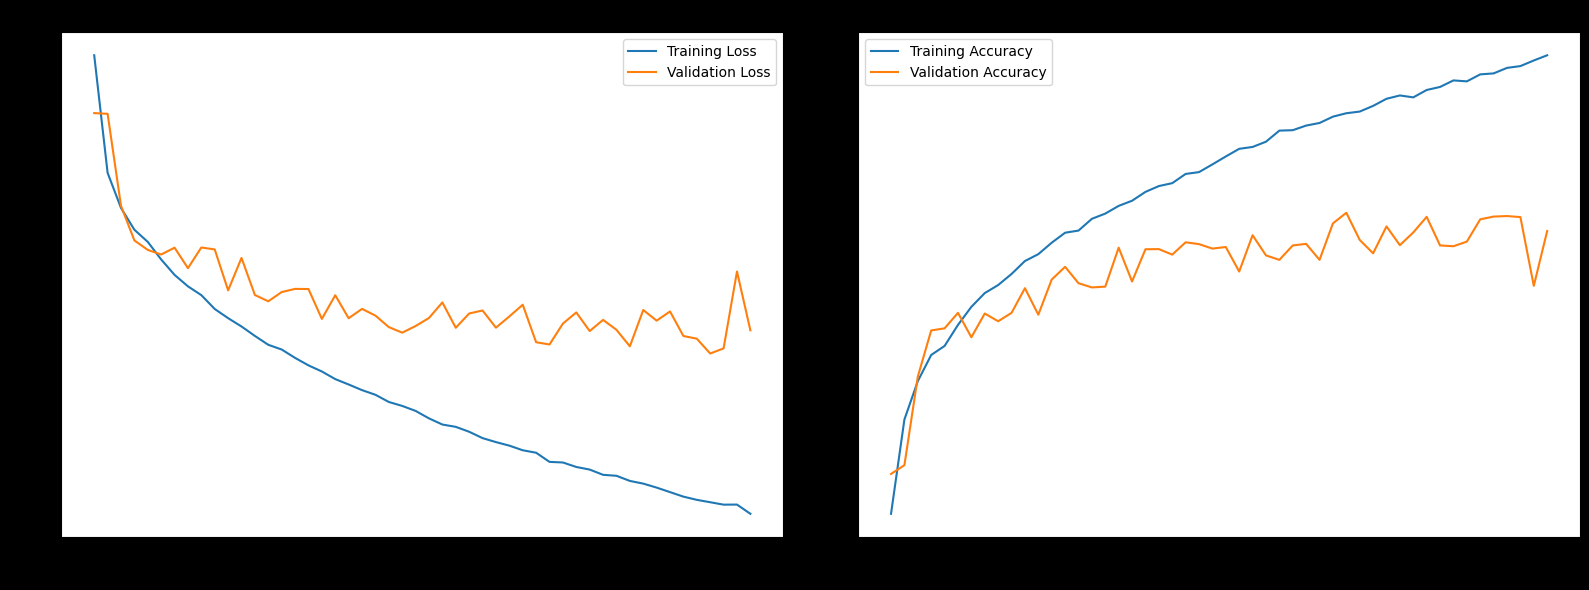

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5479 - loss: 1.2951
1.2960845232009888
0.5493000149726868


In [5]:
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

def plot_metrics(history, model_name='Model'):
    figure, axis = plt.subplots(1,2,figsize=(16,6),facecolor='black')

    #Loss Plot

    axis[0].plot(history.history['loss'], label="Training Loss")
    axis[0].plot(history.history.get('val_loss',[]),label="Validation Loss")
    axis[0].set_title(f'{model_name}-Loss')
    axis[0].set_xlabel('Epoch')
    axis[0].set_ylabel('Loss')
    axis[0].legend()

    axis[1].plot(history.history['accuracy'], label="Training Accuracy")
    axis[1].plot(history.history.get('val_accuracy',[]),label="Validation Accuracy")
    axis[1].set_title(f'{model_name}-Accuracy')
    axis[1].set_xlabel('Epoch')
    axis[1].set_ylabel('Accuracy')
    axis[1].legend()

    plt.tight_layout()
    plt.show()

ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1024),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann_history=ann.fit(X_train,y_train,epochs=50,validation_split=0.2)

plot_metrics(ann_history,model_name='ANN')

(test_loss_ann,test_accuracy_ann)=ann.evaluate(X_test,y_test)

print(test_loss_ann)
print(test_accuracy_ann)

Implementing simple Convolutional Neural Networking (CNN)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 44ms/step - accuracy: 0.3493 - loss: 1.7772 - val_accuracy: 0.5542 - val_loss: 1.2769
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.5764 - loss: 1.2020 - val_accuracy: 0.6151 - val_loss: 1.1091
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 43ms/step - accuracy: 0.6395 - loss: 1.0289 - val_accuracy: 0.6311 - val_loss: 1.0553
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 41ms/step - accuracy: 0.6718 - loss: 0.9445 - val_accuracy: 0.6376 - val_loss: 1.0319
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.6964 - loss: 0.8763 - val_accuracy: 0.6419 - val_loss: 1.0197
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.7156 - loss: 0.8160 - val_accuracy: 0.6694 - val_loss: 0.9752
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 41ms/step - accuracy: 0.7322 - loss: 0.7630 - val_accuracy: 0.6650 - val_loss: 0.9998
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 41ms/step - accuracy: 0.7551 -

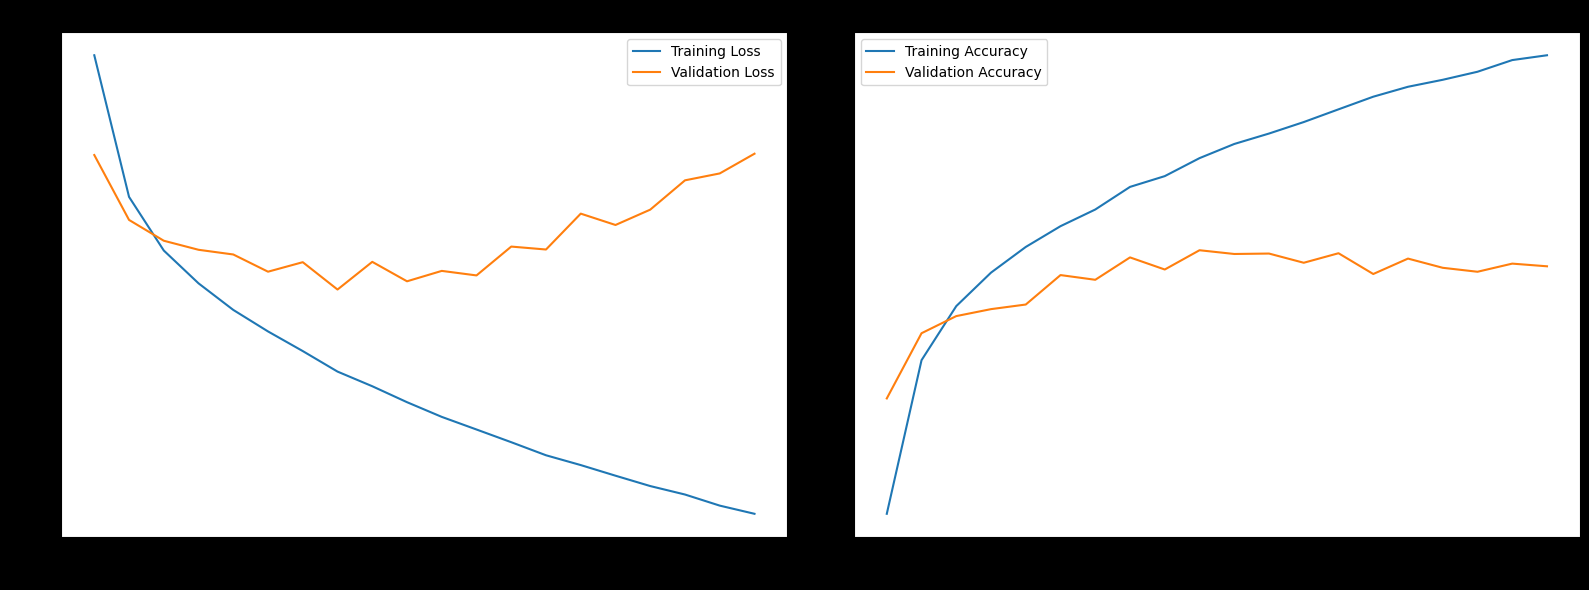

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6734 - loss: 1.2763
1.3070287704467773
0.6694999933242798


In [12]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

cnn=Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn_history=cnn.fit(X_train,y_train,epochs=20,validation_split=0.2)

plot_metrics(cnn_history,model_name="CNN")

(test_loss_cnn,test_accuracy_cnn)=cnn.evaluate(X_test,y_test)

print(test_loss_cnn)
print(test_accuracy_cnn)





In [13]:
print("Test Loss in ANN     :",test_loss_ann)
print("Test Accuracy in ANN:    ",test_accuracy_ann)
print("Test Loss in CNN     :",test_loss_cnn)
print("Test Accuracy in CNN:    ",test_accuracy_cnn)

Test Loss in ANN     : 1.2960845232009888
Test Accuracy in ANN:     0.5493000149726868
Test Loss in CNN     : 1.3070287704467773
Test Accuracy in CNN:     0.6694999933242798


In [18]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score
def generate_classification_report(model, test_data, test_labels, class_names):
    y_probs = model.predict(test_data)
    y_pred = np.argmax(y_probs, axis=1)

    # Check if test_labels is already label-encoded
    if len(test_labels.shape) == 1:  # Already class indices
        y_true = test_labels
    else:  # One-hot encoded
        y_true = np.argmax(test_labels, axis=1)

    print(f"Classification Report : \n")
    print(classification_report(y_true, y_pred, target_names=class_names))

classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]


generate_classification_report(ann, X_test, y_test, classes)
print("-"*60)
generate_classification_report(cnn, X_test, y_test, classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Classification Report : 

              precision    recall  f1-score   support

    airplane       0.59      0.70      0.64      1000
  automobile       0.69      0.63      0.66      1000
        bird       0.50      0.37      0.42      1000
         cat       0.38      0.39      0.39      1000
        deer       0.57      0.42      0.48      1000
         dog       0.41      0.56      0.47      1000
        frog       0.66      0.52      0.58      1000
       horse       0.61      0.63      0.62      1000
        ship       0.75      0.56      0.64      1000
       truck       0.49      0.72      0.59      1000

    accuracy                           0.55     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.56      0.55      0.55     10000

------------------------------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Classification Report : 

              precision    recall  f1-score 

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


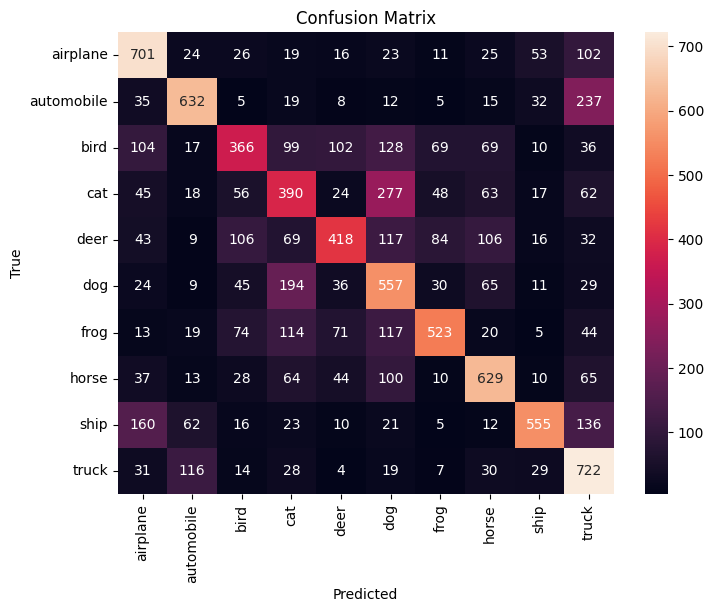

----------------------------------------------------------------------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


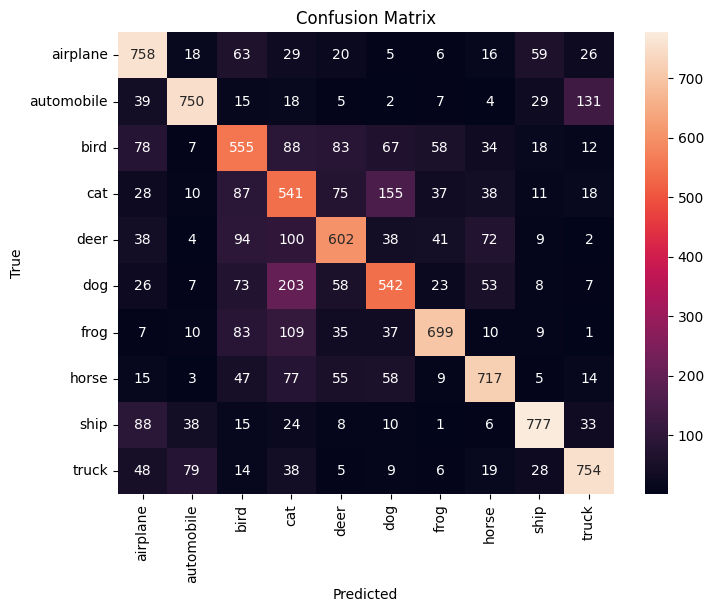

In [20]:
import seaborn as sns
def plot_confusion_matrix(model, test_data, test_labels, class_names):
    # Get predictions
    y_probs = model.predict(test_data)
    y_pred = np.argmax(y_probs, axis=1)
    y_true = test_labels if test_labels.ndim == 1 else np.argmax(test_labels, axis=1)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix")

    plt.show()

plot_confusion_matrix(ann, X_test, y_test, classes)
print("-"*100)
plot_confusion_matrix(cnn, X_test, y_test, classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


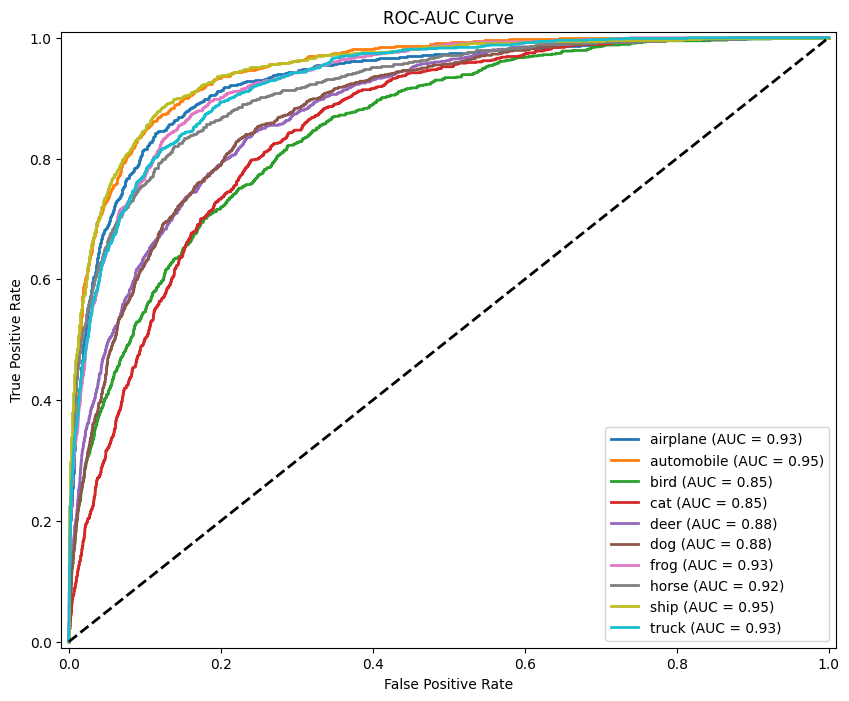

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


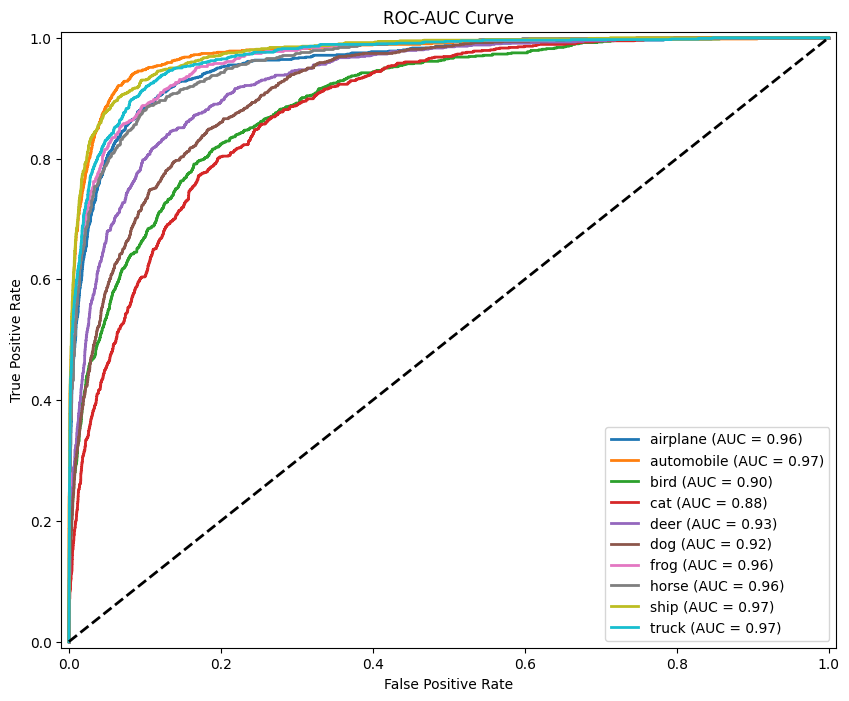

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_auc(model, test_data, test_labels, class_names):
    n_classes = len(class_names)

    if test_labels.ndim == 1:
        y_true = label_binarize(test_labels, classes=np.arange(n_classes))
    else:
        y_true = test_labels


    y_score = model.predict(test_data)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-AUC Curve")
    plt.legend(loc="lower right")

    plt.show()

plot_roc_auc(ann,X_test,y_test,classes)
plot_roc_auc(cnn,X_test,y_test,classes)
